# Problem Statement
# Predict survival rate in Titanic Dataset

# Goals
# - Build a machine learning model that can accurately predict the rate of survival


In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import numpy as np                # mathematical calculations
import pandas as pd               # manipulation of raw data 
import matplotlib.pyplot as plt   # plotting graphs
%matplotlib inline  

In [3]:
#define the dataset
path ='/gdrive/My Drive/Online_ML : Weekends Nov 2020/Assignments/Data/'

In [4]:
titanic_train = pd.read_csv(path+'titanic_train.csv')
titanic_test = pd.read_csv(path+'titanic_test.csv')

In [5]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explore and Preprocess the Data

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_train.shape

(891, 12)

In [8]:
titanic_test.shape

(837, 11)

In [9]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q
1,893.0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,NaN,S
2,894.0,2,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,NaN,Q
3,895.0,3,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,NaN,S
4,896.0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,NaN,S


In [10]:
# Check the missing value here in the dataset
titanic_train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_test.isnull().sum(axis=0)

PassengerId      1
Pclass           0
Name           419
Sex            419
Age            505
SibSp          419
Parch          419
Ticket         419
Fare           420
Cabin          746
Embarked       419
dtype: int64

In [12]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

we will remove certain data which is not related to relevant to model

In [13]:
titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1,inplace=True)

In [14]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
titanic_test.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1,inplace=True)

In [16]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0.0,0.0,7.8292,Q
1,3,female,47.0,1.0,0.0,7.0000,S
2,2,male,62.0,0.0,0.0,9.6875,Q
3,3,male,27.0,0.0,0.0,8.6625,S
4,3,female,22.0,1.0,1.0,12.2875,S


In [17]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
titanic_test.isnull().sum()

Pclass        0
Sex         419
Age         505
SibSp       419
Parch       419
Fare        420
Embarked    419
dtype: int64

In [19]:
titanic_test=titanic_test.dropna()

In [20]:
print(titanic_test['Sex'])

0        male
1      female
2        male
3        male
4      female
        ...  
409    female
411    female
412    female
414    female
415      male
Name: Sex, Length: 331, dtype: object


To analyze further, we will use LabelEncoder to convert columns "Sex" and "Embarked" into numeric format. To transform  data for training machine learning models. 

In [21]:
from sklearn.preprocessing import LabelEncoder

gender_le = LabelEncoder()
titanic_train['Sex'] = gender_le.fit_transform(titanic_train['Sex'])
titanic_test['Sex'] = gender_le.transform(titanic_test['Sex'])

In [22]:
print(titanic_test['Embarked'])

0      Q
1      S
2      Q
3      S
4      S
      ..
409    S
411    Q
412    S
414    C
415    S
Name: Embarked, Length: 331, dtype: object


In [23]:
embarked = {"S": 1, "C": 2, "Q": 3}
titanic_train['Embarked'] = titanic_train['Embarked'].map(embarked)
titanic_test['Embarked'] = titanic_test['Embarked'].map(embarked)

In [24]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,2.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [25]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0.0,0.0,7.8292,3
1,3,0,47.0,1.0,0.0,7.0000,1
2,2,1,62.0,0.0,0.0,9.6875,3
3,3,1,27.0,0.0,0.0,8.6625,1
4,3,0,22.0,1.0,1.0,12.2875,1


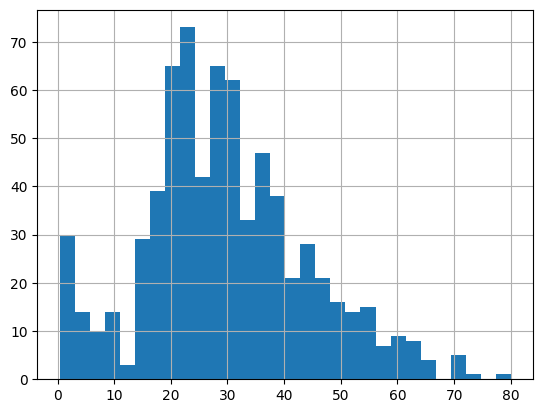

In [26]:
# Fill the missing value in both train and test data. Age and Embarked in train data has been missing value
# Fill of Missing Age. Observe that Age has been missing lot in training set so how can we fill up the missing value. Let us visualize the Age distribution

titanic_train.Age.hist(bins = 30)
plt.show()

we would like to know the average age of males and females in each passenger class of the 'titanic_train' dataset.

In [27]:
for i in titanic_train['Pclass'].unique():
    for j in titanic_train['Sex'].unique():
        print("Average Age of " + str(j) + "s in Class " + str(i) + " is: ",np.round(np.mean(titanic_train[(titanic_train.Pclass == i) & (titanic_train.Sex == j)].Age)))             

Average Age of 1s in Class 3 is:  27.0
Average Age of 0s in Class 3 is:  22.0
Average Age of 1s in Class 1 is:  41.0
Average Age of 0s in Class 1 is:  35.0
Average Age of 1s in Class 2 is:  31.0
Average Age of 0s in Class 2 is:  29.0


the following are the code where we fill the missing values in the 'Age' column of the 'titanic_train' dataset using the average age of passengers within the same passenger class and gender.

In [28]:
for i in range(titanic_train.shape[0]):
    if np.isnan(titanic_train.Age[i]):
#        print(df.Age[i])
        titanic_train.Age[i] = np.round(np.mean(titanic_train[(titanic_train.Pclass == titanic_train.Pclass[i]) & (titanic_train.Sex == titanic_train.Sex[i])].Age))
#        print(df.Age[i])

<ipython-input-28-53fdc71cbd50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_train.Age[i] = np.round(np.mean(titanic_train[(titanic_train.Pclass == titanic_train.Pclass[i]) & (titanic_train.Sex == titanic_train.Sex[i])].Age))


In [29]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Similar for Traning data set, we do for Test set

In [30]:
for i in titanic_test['Pclass'].unique():
    for j in titanic_test['Sex'].unique():
        print("Average Age of " + str(j) + "s in Class " + str(i) + " is: ",np.round(np.mean(titanic_test[(titanic_test.Pclass == i) & (titanic_test.Sex == j)].Age)))             

Average Age of 1s in Class 3 is:  24.0
Average Age of 0s in Class 3 is:  23.0
Average Age of 1s in Class 2 is:  31.0
Average Age of 0s in Class 2 is:  24.0
Average Age of 1s in Class 1 is:  41.0
Average Age of 0s in Class 1 is:  41.0


In [31]:
for i in range(titanic_test.shape[0]):
    if np.isnan(titanic_test.Age.iloc[i]):
        mean_age = np.mean(titanic_test[(titanic_test.Pclass == titanic_test.Pclass.iloc[i]) & (titanic_test.Sex == titanic_test.Sex.iloc[i]) & (~np.isnan(titanic_test.Age))].Age)
        titanic_test.Age.iloc[i] = np.round(mean_age)


In [32]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
titanic_train = titanic_train.fillna({'Embarked': titanic_train['Embarked'].mode()})

In [34]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Explore and preprocessing data

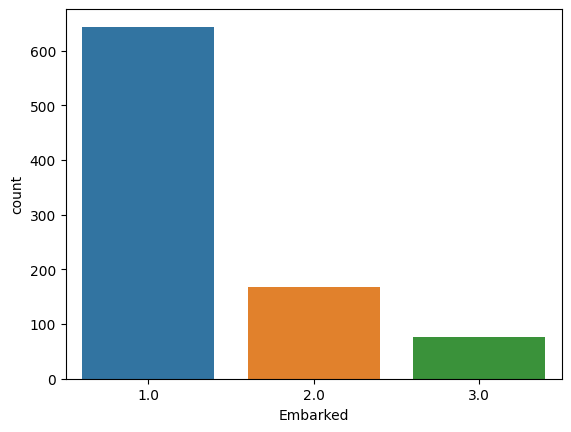

In [35]:
import seaborn as sns
sns.countplot(x = 'Embarked', data = titanic_train)
plt.show()

In [36]:
# Value 1 in Embarked feature has more value so we will fill na with value number 1
titanic_train = titanic_train.fillna({"Embarked": 1})


In [37]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
#fill missing value test set for Fare feature. Fare depend on Pclass so we will fill the na by the mean of that Pclass

titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0.0,0.0,7.8292,3
1,3,0,47.0,1.0,0.0,7.0000,1
2,2,1,62.0,0.0,0.0,9.6875,3
3,3,1,27.0,0.0,0.0,8.6625,1
4,3,0,22.0,1.0,1.0,12.2875,1


In [39]:
for x in range(len(titanic_test["Fare"])):
    if pd.isnull(titanic_test["Fare"].iloc[x]):
        pclass = titanic_test["Pclass"].iloc[x]  # Pclass = 3
        titanic_test["Fare"].iloc[x] = round(titanic_train[titanic_train["Pclass"] == pclass]["Fare"].mean(), 4)


In [40]:
titanic_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
#Split data btw output and input for training data
y = titanic_train['Survived']
y = np.array(y)
y = y.reshape(-1,1)
y.shape


(891, 1)

In [42]:
x_train = titanic_train.drop(columns=['Survived'])
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1.0
1,1,0,38.0,1,0,71.2833,2.0
2,3,0,26.0,0,0,7.9250,1.0
3,1,0,35.0,1,0,53.1000,1.0
4,3,1,35.0,0,0,8.0500,1.0


In [45]:
#now we need to normalize the scale of the input variables
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X= x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y)
X.shape, y_train.shape

((891, 7), (891, 1))

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y_train, test_size = 0.22, random_state = 0)

We will using data model: Linear Regression for predicting survival rate



In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [49]:
model = LinearRegression()


In [54]:

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_val)

# Evaluate the model's performance
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Absolute Error: 0.5989575200218268
Mean Squared Error: 0.5673283472847789
Root Mean Squared Error: 0.7532120201409288
R-squared Score: 0.42473833536809813


Going to export the output of model

In [55]:

# Assuming y_test and y_pred are defined correctly

# Reshape y_test and y_pred arrays to be 1-dimensional
y_test = np.array(y_val).reshape(-1)
y_pred = np.array(y_val).reshape(-1)

# Create a DataFrame with the true values (y_test) and predicted values (y_pred)
df_output = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Save the DataFrame as a CSV file
df_output.to_csv('model_output.csv', index=False)


In [56]:

# Read the CSV file
df_output = pd.read_csv('model_output.csv')

# Access the columns of the DataFrame
true_values = df_output['True Values']
predicted_values = df_output['Predicted Values']

# Perform operations on the columns
# For example, calculate the absolute difference between true values and predicted values
absolute_difference = abs(true_values - predicted_values)

# Print the calculated values
print("True Values:")
print(true_values)

print("Predicted Values:")
print(predicted_values)

print("Absolute Difference:")
print(absolute_difference)


True Values:
0     -0.789272
1     -0.789272
2     -0.789272
3      1.266990
4      1.266990
         ...   
192    1.266990
193    1.266990
194   -0.789272
195   -0.789272
196   -0.789272
Name: True Values, Length: 197, dtype: float64
Predicted Values:
0     -0.789272
1     -0.789272
2     -0.789272
3      1.266990
4      1.266990
         ...   
192    1.266990
193    1.266990
194   -0.789272
195   -0.789272
196   -0.789272
Name: Predicted Values, Length: 197, dtype: float64
Absolute Difference:
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
192    0.0
193    0.0
194    0.0
195    0.0
196    0.0
Length: 197, dtype: float64


As the output of Titanic the Absolute Difference value of True values and Predicted Value of Model Linear Regression is better performance for predicting survival rate more than Random forest as Random forest only use for Continous variable